In [1]:
install.packages('dHSIC')
library(dHSIC)

package 'dHSIC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\d0156\AppData\Local\Temp\RtmpMDt0EY\downloaded_packages


Warning message:
"package 'dHSIC' was built under R version 3.6.3"

In [ ]:
# initialize data
set.seed(0)
X <- matrix(rnorm(200),ncol=3)

# permutation test
dhsic.test(X, method="permutation",
           kernel=c("discrete", "discrete", "gaussian"),
           pairwise=TRUE, B=1000)$p.value

In [ ]:
# permutation 
nvals <- matrix(seq(from = 100, to = 1000, by = 100))
perm_counts <- matrix(0, 1, length(nvals))

for (i in seq_along(nvals)) {
    n = nvals[i]
    x <- matrix(rnorm(n),ncol=1)
    y <- matrix(rnorm(n),ncol=1)
    z <- matrix(rnorm(n),ncol=1)
    
    count <- 0
    for (m in 1:1000) {
        if (dhsic.test(list(x,y,z), alpha = 0.05, method="permutation", kernel="gaussian",
                           pairwise=FALSE, matrix.input=FALSE, B=25)$p.value < 0.05) {
            count <- count + 1
        }
    }
    perm_counts[i] <- count
}

perm_counts

In [29]:
# bootstrap
nvals <- matrix(seq(from = 100, to = 1000, by = 100))
boot_counts <- matrix(0, 1, length(nvals))

for (i in seq_along(nvals)) {
    n = nvals[i]
    x <- matrix(rnorm(n),ncol=1)
    y <- matrix(rnorm(n),ncol=1)
    z <- matrix(rnorm(n),ncol=1)
    
    count <- 0
    for (m in 1:1000) {
        if (dhsic.test(list(x,y,z), alpha = 0.05, method="bootstrap", kernel="gaussian",
                           pairwise=FALSE, matrix.input=FALSE, B=25)$p.value < 0.05) {
            count <- count + 1
        }
    }
    boot_counts[i] <- count
}

boot_counts

934,990,994,40,596,105,347,909,692,64


In [30]:
# gamma
nvals <- matrix(seq(from = 100, to = 1000, by = 100))
gamma_counts <- matrix(0, 1, length(nvals))

for (i in seq_along(nvals)) {
    n = nvals[i]
    x <- matrix(rnorm(n),ncol=1)
    y <- matrix(rnorm(n),ncol=1)
    z <- matrix(rnorm(n),ncol=1)
    
    count <- 0
    for (m in 1:1000) {
        if (dhsic.test(list(x,y,z), alpha = 0.05, method="bootstrap", kernel="gaussian",
                           pairwise=FALSE, matrix.input=FALSE, B=25)$p.value < 0.05) {
            count <- count + 1
        }
    }
    gamma_counts[i] <- count
}

gamma_counts

4,721,974,831,0,436,762,533,846,961


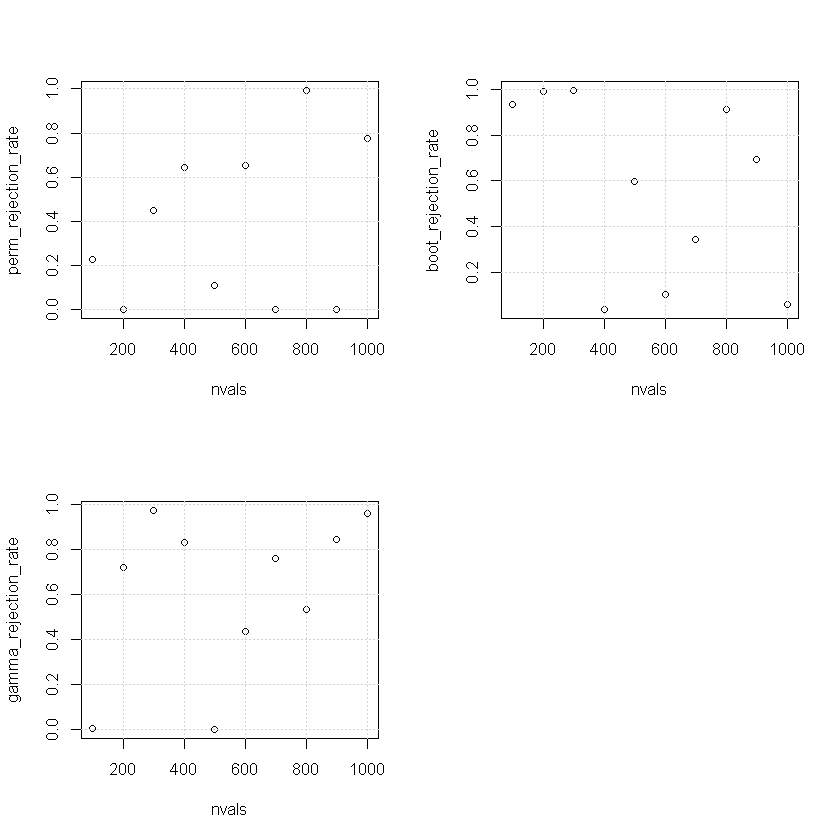

In [32]:
par(mfrow=c(2,2))
perm_rejection_rate <- perm_counts/1000
plot(nvals, perm_rejection_rate)
grid()
boot_rejection_rate <- boot_counts/1000
plot(nvals, boot_rejection_rate)
grid()
gamma_rejection_rate <- gamma_counts/1000
plot(nvals, gamma_rejection_rate)
grid()